# Chapter 2: Getting Started
**Learning Computer Vision with DSal**

OpenCV-Python is the Python API for OpenCV, allowing developers to perform image processing, computer vision, and machine learning tasks. It is built on C++ but provides Python bindings for ease of use.
OpenCV-Python is the Python API for OpenCV, an open-source computer vision and image processing library. OpenCV provides a wide range of functionalities for working with images and videos, including object detection, facial recognition, and real-time processing.

To install OpenCV using pip:
```bash
pip install opencv-python
```
OpenCV is not included in Python by default, so we need to install it separately using pip.
For additional functionalities like GUI features and video support, install:
```bash
pip install opencv-contrib-python
```

In [ ]:
## Importing libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

-   **cv2 (OpenCV)** → Provides functions for loading, modifying, and analyzing images/videos.
-   **numpy (NumPy)** → Used for array manipulations (since images are stored as arrays).
-   **matplotlib.pyplot** → Used for displaying images in Jupyter Notebooks or scripts.

In [ ]:
## Reading and Displaying an Image

img = cv2.imread('image01.jpg')
cv2.imshow('It is an astronaut.', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

-   **cv2.imread()** → Reads an image from the given path; OpenCV loads the image as a NumPy array; Default mode: BGR format (Blue-Green-Red) instead of RGB.
-   **cv2.imshow()** → Opens a window displaying the image.
-   **cv2.waitKey()** → Keeps the window open until a key is pressed; If we use cv2.waitKey(1000), the window stays open for 1 second (1000 ms).
-   **cv2.destroyAllWindows()** ensures all OpenCV windows are closed. → Closes all OpenCV windows.

In [ ]:
## Understanding Image Structure

print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(540, 720, 3)


-  **OpenCV** loads images as a NumPy array (numpy.ndarray); img.shape returns a tuple:
-  **Shape**: (height, width, channels)
-  **512** → height
-  **720**→ width
-  **3** → three color channels (BGR: Blue, Green, Red)


In [ ]:
## Saving Images in Different Formats

cv2.imwrite('output1.jpg', img)
cv2.imwrite('output1.png', img)

True

**Why is PNG larger than JPEG?**

-   **PNG uses lossless compression** → retains all pixel information.
PNG has larger file size  and it supports transparency (alpha channel).
-   **JPEG uses lossy compression** → reduces file size by discarding some data.
In JPEG format, some image data is discarded. It has maller file size and it is used for photos and web images.

**Compression in Images:** Compression reduces file size by removing redundant or unnecessary data. Lossy compression re-duces quality slightly, while lossless retains full quality.

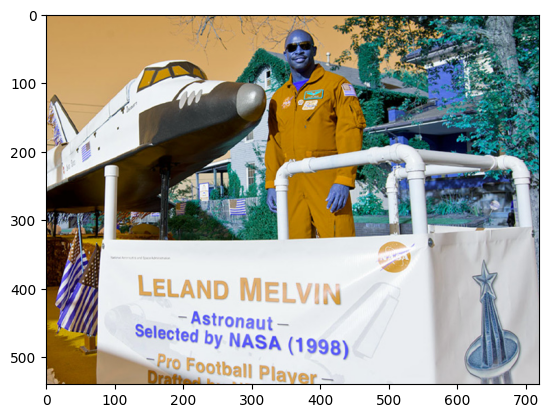

In [ ]:
## Displaying Images with Matplotlib

plt.imshow(img)
plt.show()

**OpenCV** loads images in BGR format, but Matplotlib expects RGB.

This causes color distortion.

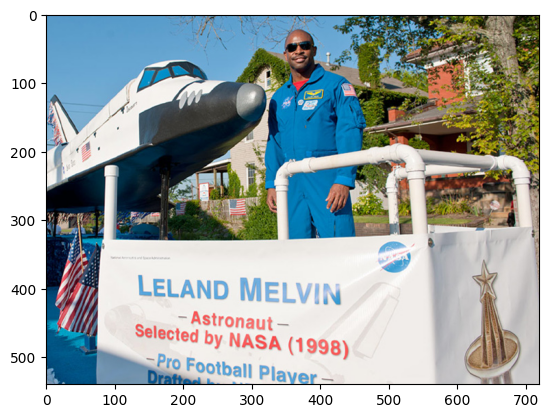

In [ ]:
## Fixing the BGR to RGB issue

plt.imshow(img[:, :, ::-1])
plt.show()

**img[:, :, ::-1]** reverses the last dimension (color channels).

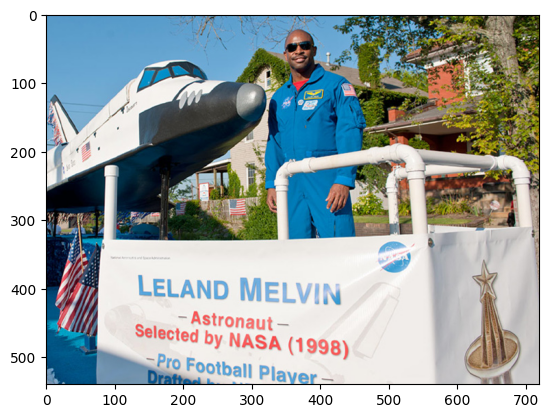

In [ ]:
## Alternative Method using OpenCV

rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
plt.show()

**cv2.cvtColor(img, cv2.COLOR_BGR2RGB)** converts BGR to RGB.

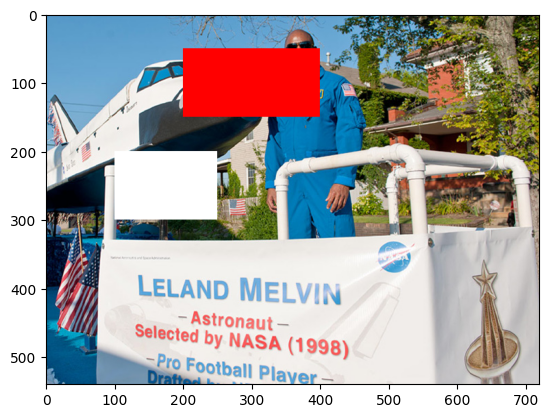

In [ ]:
## Modifying Image Pixels

img = cv2.imread('image01.jpg')
img[200:300, 100:250, :] = 255 # set a rectangular region to white
img[50:150, 200:400, :] = (0, 0, 255) # set a smaller rectangular region to red usingBGR format)
plt.imshow(img[..., ::-1])
plt.show()

**Direct pixel manipulation**:
-  **img[200:300, 300:500, :] = 255** → White box
-  **img[200:300, 300:500, :] = (0,0,255)** → Red box

**Converting a Color Image to Grayscale**: grayscale images contain only intensity information, making them simpler and faster to process than colored images. OpenCV provides multiple ways to convert an image to grayscale.


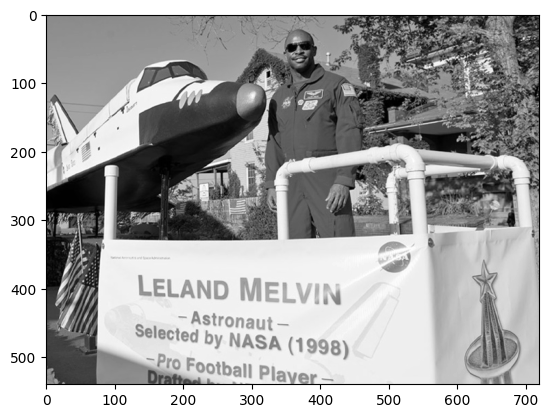

In [ ]:
## Using cv2.cvtColor() to Convert to Grayscale

img = cv2.imread('image01.jpg')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
cv2.waitKey(0)
cv2.destroyAllWindows()

-  **cv2.imread('./images/input.jpg')** → Reads the image into a NumPy array.
-  **cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)** → Converts the image from BGR to Grayscale.
-  **cv2.imshow('Grayscale', gray_image)** → Displays the grayscale image.
-  **cv2.waitKey(0)** → Waits for a key press before closing.
-  **cv2.destroyAllWindows()** → Closes all OpenCV windows.

In [ ]:
## Faster Method: Direct Grayscale Loading

img = cv2.imread('image01.jpg', 0)
print(img.shape)

cv2.imshow('Grayscale Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(540, 720)


Instead of converting an image after loading, we can directly load it in grayscale mode using OpenCV.

-	**cv2.imread('./images/input.jpg', 0)** → Loads the image directly as a grayscale image.
-	**img.shape** → Since it's grayscale, it returns (height, width), without a third channel.

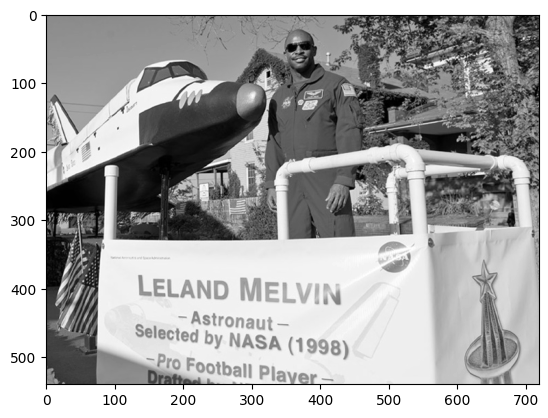

In [ ]:
## Displaying Grayscale Image Using Matplotlib

plt.imshow(img, cmap='gray')
plt.show()

Matplotlib by default assumes images are RGB, so we use cmap='gray' to properly display a grayscale image.
-	**cmap='gray'** → Ensures correct grayscale visualization in Matplotlib.

In [ ]:
## Understanding Image Dimensions

img = cv2.imread('image01.jpg')
B, G, R = img[10, 50]
print(B, G, R)
print("Shape:", img.shape)

202 154 88
Shape: (540, 720, 3)


-	**Color Image Shape** → (Height, Width, 3) (since it's BGR).
-	**Grayscale Image Shape** → (Height, Width) (only 1 channel).

In [13]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray_img[10, 50])
print("Shape:", gray_img.shape)

140
Shape: (540, 720)


**How Does Grayscale Conversion Work?**

A grayscale image is created using weighted averaging of the RGB channels:

**Gray = (0.2989 x R) + (0.5870 x G) + (0.1140 x B)**
-	Red (R) contributes 29.89% to the grayscale intensity.
-	Green (G) contributes 58.70% (most important due to human vision sensitivity).
-	Blue (B) contributes 11.40% (least significant).

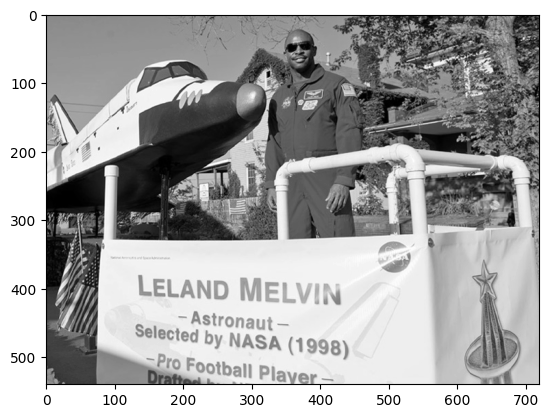

In [ ]:
## Converting to Grayscale

gray_manual = (0.2989 * img[..., 2]) + (0.5870 * img[..., 1]) + (0.1140 * img[..., 0]).astype(np.uint8)
plt.imshow(gray_manual, cmap='gray')
plt.show()

We extract RGB channels using array slicing:
-   **image[..., 2]** → Red
-   **image[..., 1]** → Green
-   **image[..., 0]** → Blue

(540, 720)


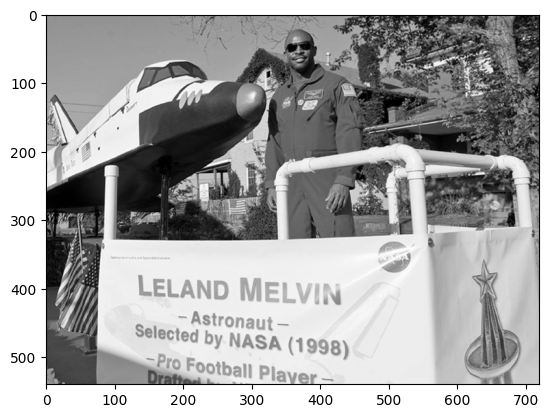

In [ ]:
## Simple Approximation (Equal Weights)

new_img = img[..., 0] // 3 + img[..., 1] // 3 + img[..., 2] // 3
print(new_img.shape)
plt.imshow(new_img, cmap='gray')
plt.show()

This method is simpler but less accurate because all colors are given equal importance.

**Cropping an Image Using NumPy in OpenCV**

Cropping an image in OpenCV is simple and efficient using NumPy array slicing. Since images in OpenCV are represented as NumPy arrays, we can directly access pixel regions using slicing.

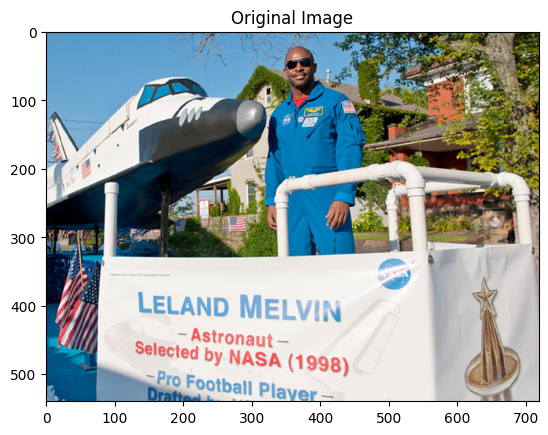

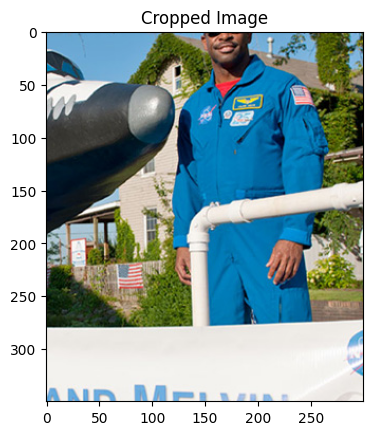

In [ ]:
## Basic Cropping Using NumPy

img = cv2.imread('image01.jpg')
plt.imshow(img[..., ::-1])
plt.title("Original Image")
plt.show()

height, width = img.shape[:2]
cropped = img[50:400, 200:500]

plt.imshow(cropped[..., ::-1])
plt.title("Cropped Image")
plt.show()

-	**image.shape[:2]** → Extracts height and width (ignoring the color channel).
-	**image[250:400, 250:550]** → Crops from:
    1.  rows: 250 to 400
    2.  Columns: 250 to 550
-	**Matplotlib Display**: Since OpenCV loads images in BGR format, we use image[..., ::-1] to convert to RGB.

**Reading and Splitting the Image**: Breaking the image into its basic color components — Blue, Green, and Red — so I can understand and analyze how much of each color exists in every pixel.

In [17]:
img = cv2.imread('image01.jpg')
b, g, r = cv2.split(img)

Breaking the image into its basic color components — Blue, Green, and Red — so I can understand and analyze how much of each color exists in every pixel.

cv2.split(img) separates the 3D image into three 2D arrays:
-   b: blue channel
-   g: green channel
-   r: red channel

Each channel is a grayscale image showing how much of that color is present in each pixel.


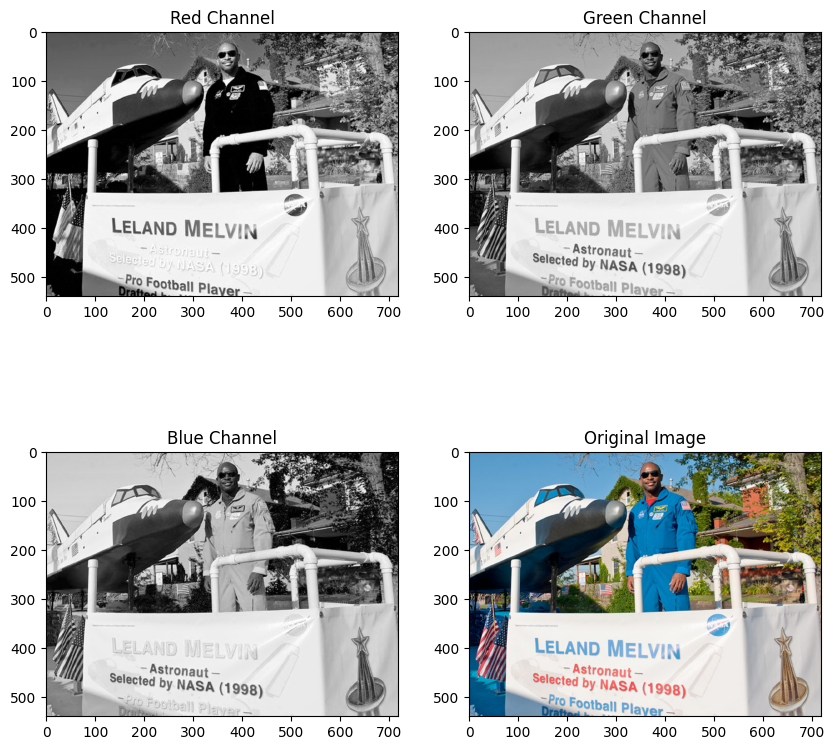

In [ ]:
## Viewing the Individual Channels

plt.figure(figsize=[10, 10])
plt.subplot(221); plt.imshow(r, cmap='gray'); plt.title("Red Channel")
plt.subplot(222); plt.imshow(g, cmap='gray'); plt.title("Green Channel")
plt.subplot(223); plt.imshow(b, cmap='gray'); plt.title("Blue Channel")
plt.subplot(224); plt.imshow(img[..., ::-1]); plt.title("Original Image")
plt.show()

-   Creates a wide figure to place multiple subplots in two rows and two columns **plt.subplot(221)**.
-	Subplot 1 of 4 → Shows the red channel.
-	**cmap='gray'** → displays the intensity in grayscale — white = high red, black = low red.
-	Subplot 4 of 4 → shows the original image.
-	**img[:,:,::-1]** → reverses the channel order from BGR to RGB.
-   **img[:,:,::-1]** → is a slicing trick:
-   **:** → keep all rows and columns
-   **::-1** → reverse the third dimension (color channels)


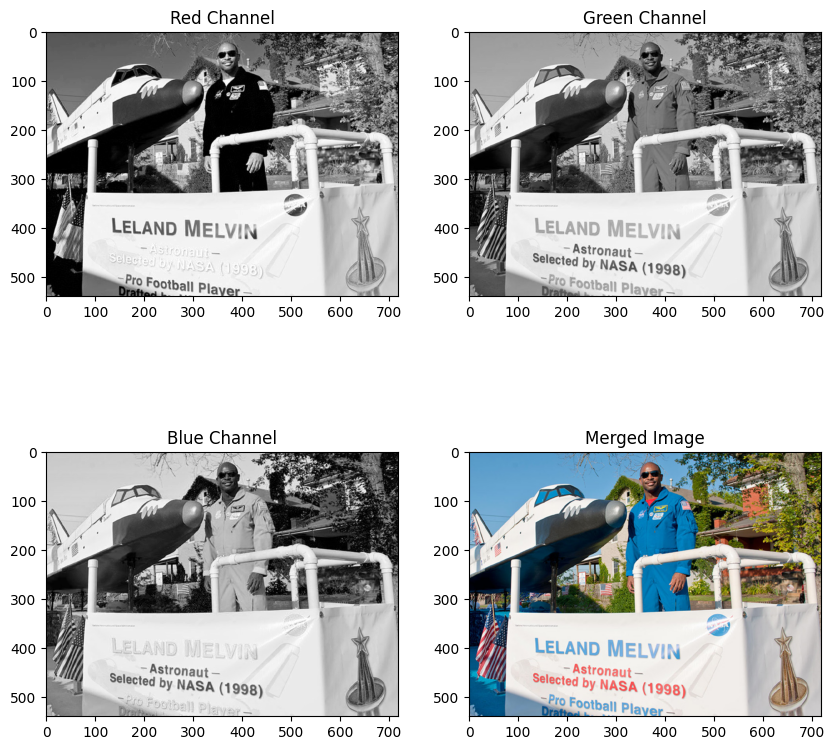

In [ ]:
## Merging the Channels Back

merged = cv2.merge([b, g, r])
plt.figure(figsize=[10, 10])
plt.subplot(221); plt.imshow(r, cmap='gray'); plt.title("Red Channel")
plt.subplot(222); plt.imshow(g, cmap='gray'); plt.title("Green Channel")
plt.subplot(223); plt.imshow(b, cmap='gray'); plt.title("Blue Channel")
plt.subplot(224); plt.imshow(merged[..., ::-1]); plt.title("Merged Image")
plt.show()

Display the merged image again alongside the original color layers to make sure my merge worked correctly.
-	Same display as before, just now using the merged image instead of the original one.
-	It should look exactly the same as the original — that's how we validate split and merge.

In [ ]:
## Creating blank channels

zeros = np.zeros_like(r, dtype='uint8')

-	**np.zeros_like(r)** creates a blank array the same shape as the red channel (grayscale image).
-	**dtype='uint8'**:
    1.	**u** → unsigned (only positive numbers)
    2.	**int** → integer values
    3.	**8** → 8 bits (values range from 0 to 255; standard for pixel intensity)


In [ ]:
## Isolating individual colors

red = cv2.merge([zeros, zeros, r])
green = cv2.merge([zeros, g, zeros])
blue = cv2.merge([b, zeros, zeros])

Building new images where only one color (Red, Green, or Blue) is visible, and the rest are turned off.
-	For red: Only the red channel is active. Green and blue channels are replaced with black (zeros).
-	Same for green and blue images.

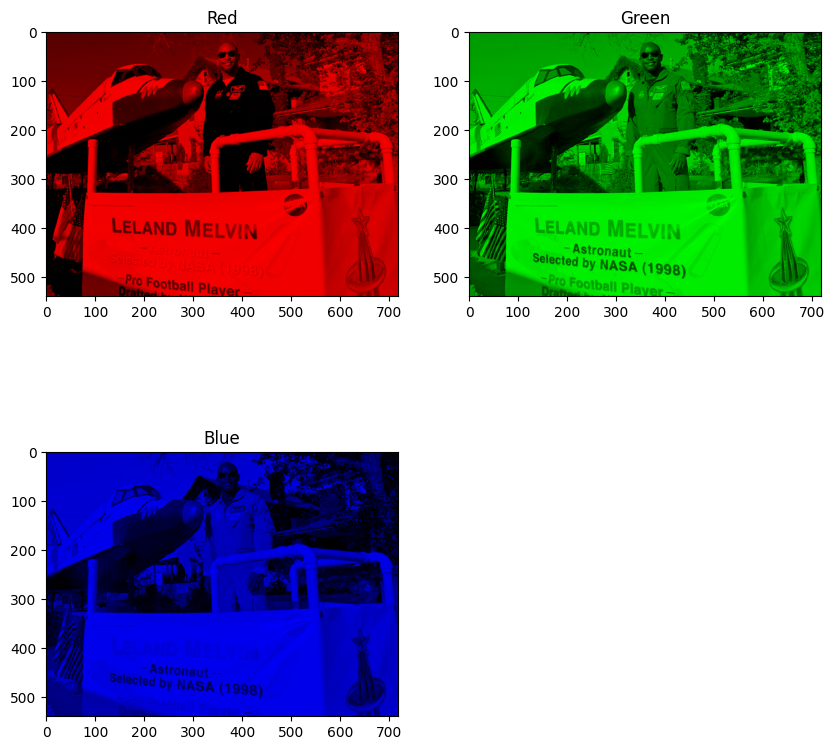

In [ ]:
## Viewing Isolated Colors in Full Color

plt.figure(figsize=[10,10])
plt.subplot(221); plt.imshow(red[..., ::-1]); plt.title("Red")
plt.subplot(222); plt.imshow(green[..., ::-1]); plt.title("Green")
plt.subplot(223); plt.imshow(blue[..., ::-1]); plt.title("Blue")
plt.show()

-	Display each isolated color.
-	[..., ::-1]: again reverses BGR to RGB for matplotlib. This time using ellipsis (...) for brevity instead of [:,:,::-1].


In [ ]:
## Read and Split the Image

b, g, r = cv2.split(img)

-	Reads the image in BGR format
-	Then splits it into 3 separate grayscale layers: **b** → blue channel ; **g** → green channel ; **r** → red channel

In [ ]:
## Modify the Blue Channel

modified_b = b + 20

-	This adds 20 to every pixel in the blue channel.
-	Makes the blue areas brighter.
-	But this can cause pixel values to go above 255 (which is the max intensity).

**Better approach**: Use OpenCV’s built-in safe function → **cv2.add(b, 20)**

In [ ]:
## Merge Channels Back

merged = cv2.merge([modified_b, g, r])

Reconstructs the full-color image with the modified blue, and original green and red.

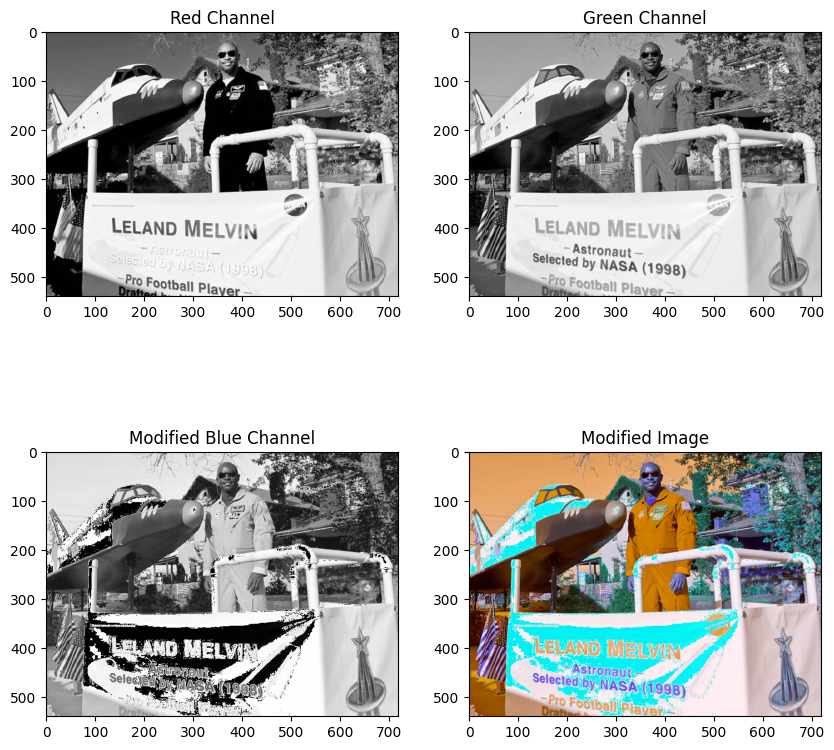

In [ ]:
## Display the result

plt.figure(figsize=[10,10])
plt.subplot(221); plt.imshow(r, cmap='gray'); plt.title("Red Channel")
plt.subplot(222); plt.imshow(g, cmap='gray'); plt.title("Green Channel")
plt.subplot(223); plt.imshow(modified_b, cmap='gray'); plt.title("Modified Blue Channel")
plt.subplot(224); plt.imshow(merged, cmap='gray'); plt.title("Modified Image")
plt.show()

-	Shows the red, green, and modified blue channels in grayscale.
-	The 4th plot shows the final color image (after increasing blue channel).

**What Are Arithmetic Operations in Images?** Arithmetic operations are pixel-wise mathematical operations that modify image intensity — like adding brightness, increasing contrast, subtracting shadows, or combining multiple images.
Common operations:
-   **Addition ( + )** → brightens image
-   **Subtraction ( - )** → darkens image
-   **Multiplication ( * )**  → increases contrast
-   **Division ( / )** → decreases contrast

**Why use cv2.add() instead of b + 20?** Because NumPy wraps values on overflow.

In [27]:
>>> np.uint8([250]) + 10    # wraps around (250 + 10 = 4)

array([4], dtype=uint8)

In [28]:
>>> cv2.add(np.uint8([250]), 10)    # Safe! stays at 255

array([[255]], dtype=uint8)

In [29]:
assert np.all(modified_b == cv2.add(b, 20))

AssertionError: 

This throws an error if the two arrays are not equal — a good way to catch bugs during development.
-   Always use OpenCV functions like cv2.add, cv2.subtract, etc.
-   Avoid direct arithmetic with NumPy if you're working with 8-bit images.